In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Load Titanic data

The Titanic dataset was obtained from https://github.com/awesomedata/awesome-public-datasets/blob/master/Datasets/titanic.csv.zip

In [3]:
titanic = pd.read_csv('titanic.csv')

## Plot histograms of how much passengers paid for fare and ages

0.3838383838383838, 0.6161616161616161, 891


(0.0, 100.0)

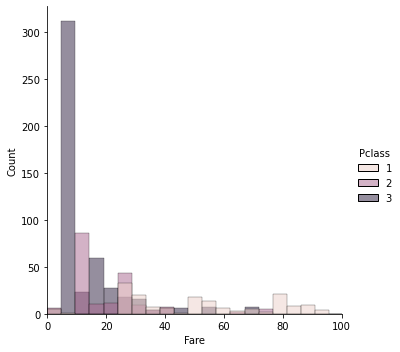

In [34]:
titanic.shape
num_survived = len(titanic[titanic.Survived == True])
num_died = len(titanic[titanic.Survived == False])
total = num_survived+num_died
print(f'{num_survived/total}, {num_died/total}, {num_survived+num_died}')
# titanic.columns

# plt.figure()
# ax = titanic[titanic.Pclass==1].Fare.plot.hist(bins=40, alpha=0.5)
# ax.set_xlabel('Fare')
# ax.set_ylabel('# of passengers')

# ax = titanic[titanic.Pclass==3].Fare.plot.hist(bins=5, alpha=0.5)
# ax.set_xlabel('Fare')
# ax.set_ylabel('# of passengers')

# plt.figure()
# ax = titanic.Age[titanic.Pclass==3].plot.hist(bins=40, alpha=0.5)
# ax.set_xlabel('Age')
# ax.set_ylabel('# of passengers')

# titanic.Pclass.unique()

sns.displot(data=titanic, x='Fare', hue='Pclass')
plt.xlim((0,100))

## Look at summary statistics mean, median, and mode

In [40]:
titanic.Age.mode()

0    24.0
dtype: float64

## Show a bar chart of the classes of passengers

<AxesSubplot:xlabel='Pclass', ylabel='count'>

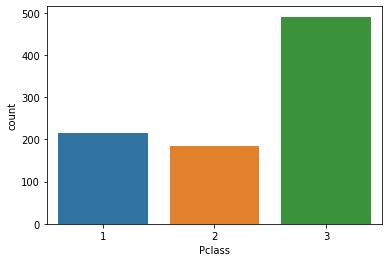

In [41]:
sns.countplot(x='Pclass', data=titanic)

## Show survival rate for the classes of passengers

In [46]:
groupedByClass = titanic.groupby('Pclass')
countByClass = groupedByClass.agg({'Name':['size'], 'Survived':'sum'})
countByClass.columns = ['Total', 'Survived']
countByClass['percSurvived'] = countByClass.Survived/countByClass.Total
countByClass

,Total,Survived,percSurvived
Pclass,,,
1,216,136,0.629630
2,184,87,0.472826
3,491,119,0.242363


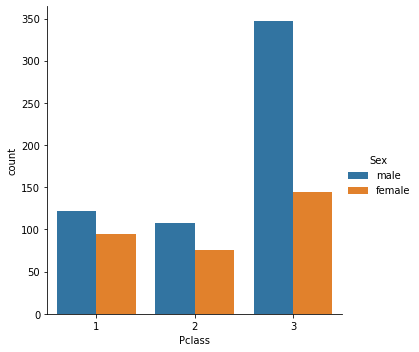

In [48]:
sns.catplot(x='Pclass', hue='Sex', data=titanic, kind='count')

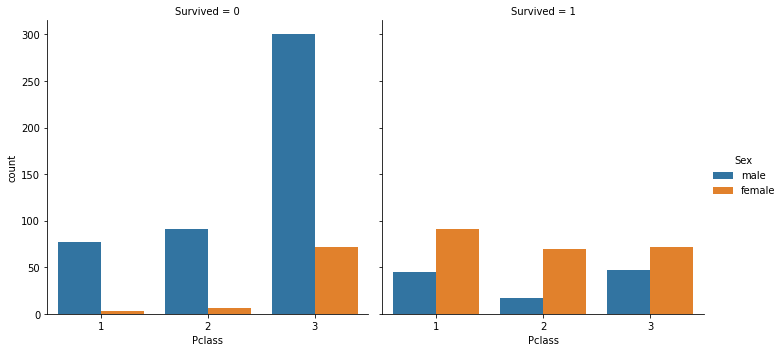

In [49]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=titanic, kind='count')

0.5398230088495575
0.36118251928020567


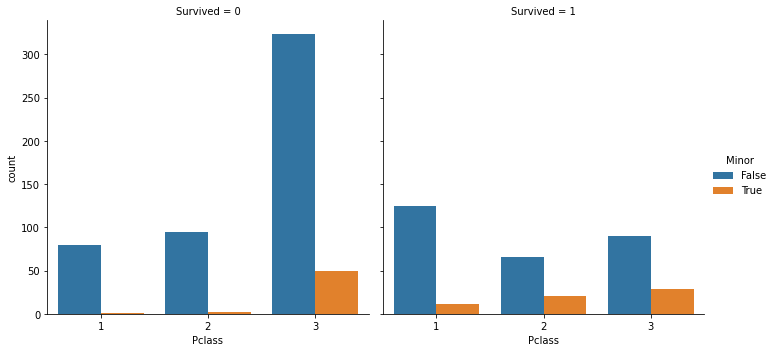

In [58]:
titanic['Minor'] = titanic.Age < 18
sns.catplot(x='Pclass', hue='Minor', col='Survived', data=titanic, kind='count')

minors_survived = titanic[titanic.Minor & titanic.Survived]
minors_died = titanic[titanic.Minor & ~titanic.Survived]
print(len(minors_survived)/(len(minors_survived)+len(minors_died)))

majors_survived = titanic[~titanic.Minor & titanic.Survived]
majors_died = titanic[~titanic.Minor & ~titanic.Survived]
print(len(majors_survived)/(len(majors_survived)+len(majors_died)))

